In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('housing.data', sep=' *', header=None, names=[c for c in range(1, 15)])
df = pd.DataFrame(data)

print(df)


           1     2      3   4      5      6      7       8   9      10    11  \
0     0.00632  18.0   2.31   0  0.538  6.575   65.2  4.0900   1  296.0  15.3   
1     0.02731   0.0   7.07   0  0.469  6.421   78.9  4.9671   2  242.0  17.8   
2     0.02729   0.0   7.07   0  0.469  7.185   61.1  4.9671   2  242.0  17.8   
3     0.03237   0.0   2.18   0  0.458  6.998   45.8  6.0622   3  222.0  18.7   
4     0.06905   0.0   2.18   0  0.458  7.147   54.2  6.0622   3  222.0  18.7   
5     0.02985   0.0   2.18   0  0.458  6.430   58.7  6.0622   3  222.0  18.7   
6     0.08829  12.5   7.87   0  0.524  6.012   66.6  5.5605   5  311.0  15.2   
7     0.14455  12.5   7.87   0  0.524  6.172   96.1  5.9505   5  311.0  15.2   
8     0.21124  12.5   7.87   0  0.524  5.631  100.0  6.0821   5  311.0  15.2   
9     0.17004  12.5   7.87   0  0.524  6.004   85.9  6.5921   5  311.0  15.2   
10    0.22489  12.5   7.87   0  0.524  6.377   94.3  6.3467   5  311.0  15.2   
11    0.11747  12.5   7.87   0  0.524  6

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
/usr/local/lib/python3.6/site-packages/pandas/io/parsers.py:2227: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/usr/local/lib/python3.6/site-packages/pandas/io/parsers.py:2229: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


In [121]:
cols = df.columns.tolist()
cols = [0] + cols[:]
df_intercept = df.reindex(columns=cols)
df_intercept[0] = 1
# print(df_intercept)
df_resample = df_intercept.sample(frac=1).reset_index(drop=True)
print(df_resample)


     0         1     2      3   4       5      6      7       8   9      10  \
0     1  13.67810   0.0  18.10   0  0.7400  5.935   87.9  1.8206  24  666.0   
1     1   0.11132   0.0  27.74   0  0.6090  5.983   83.5  2.1099   4  711.0   
2     1   5.66998   0.0  18.10   1  0.6310  6.683   96.8  1.3567  24  666.0   
3     1   0.00632  18.0   2.31   0  0.5380  6.575   65.2  4.0900   1  296.0   
4     1   1.49632   0.0  19.58   0  0.8710  5.404  100.0  1.5916   5  403.0   
5     1   0.02187  60.0   2.93   0  0.4010  6.800    9.9  6.2196   1  265.0   
6     1   0.26169   0.0   9.90   0  0.5440  6.023   90.4  2.8340   4  304.0   
7     1   2.37934   0.0  19.58   0  0.8710  6.130  100.0  1.4191   5  403.0   
8     1   0.02731   0.0   7.07   0  0.4690  6.421   78.9  4.9671   2  242.0   
9     1   0.05479  33.0   2.18   0  0.4720  6.616   58.1  3.3700   7  222.0   
10    1   0.44178   0.0   6.20   0  0.5040  6.552   21.4  3.3751   8  307.0   
11    1   0.15876   0.0  10.81   0  0.4130  5.961   

In [122]:
n = len(cols)
train_X = np.array(df_resample.loc[0:400, 0:n - 2])
train_y = np.array(df_resample.loc[0:400, n - 1], ndmin=2)
train_y = train_y.transpose()
# train_y.shape = (401,1)
test_X = df_resample.loc[400:505, 0:n - 2]
test_y = df_resample.loc[400:505, n - 1]
print(train_X)

[[1.00000e+00 1.36781e+01 0.00000e+00 ... 2.02000e+01 6.89500e+01
  3.40200e+01]
 [1.00000e+00 1.11320e-01 0.00000e+00 ... 2.01000e+01 3.96900e+02
  1.33500e+01]
 [1.00000e+00 5.66998e+00 0.00000e+00 ... 2.02000e+01 3.75330e+02
  3.73000e+00]
 ...
 [1.00000e+00 3.56868e+00 0.00000e+00 ... 2.02000e+01 3.93370e+02
  1.43600e+01]
 [1.00000e+00 6.58800e-02 0.00000e+00 ... 1.78000e+01 3.95560e+02
  7.56000e+00]
 [1.00000e+00 1.54450e-01 2.50000e+01 ... 1.97000e+01 3.90680e+02
  6.86000e+00]]


In [123]:
theta = np.random.rand(n - 1, 1)
# theta = pd.DataFrame(theta)
print(theta)


[[0.18658742]
 [0.63741537]
 [0.50349085]
 [0.97064631]
 [0.76264375]
 [0.46127323]
 [0.62746708]
 [0.65118828]
 [0.10052609]
 [0.37584318]
 [0.65521952]
 [0.2783185 ]
 [0.19861758]
 [0.76596312]]


In [133]:
def linear_regression(X, y, theta):
    iteration = 10
    alpha = 0.0001
    cost_history = []
    theta_history = [theta]
    m = len(y)
    for i in range(iteration):
        h = np.dot(X, theta)
        loss = h - y
        cost = np.dot(loss.T, loss) / (2 * m)
        cost_history.append(cost[0])
        gradient = np.dot(X.T, loss) / m
        theta = theta - alpha * gradient
        theta_history.append(theta[0])
    return theta_history, cost_history


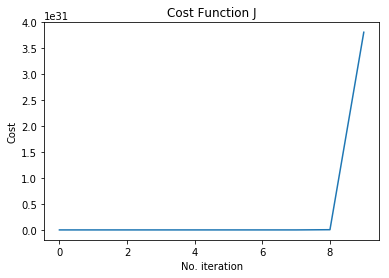

In [134]:
theta_history, cost_history = linear_regression(train_X, train_y, theta)
theta_result = theta_history[-1]
plt.title('Cost Function J')
plt.xlabel('No. iteration')
plt.ylabel('Cost')
plt.plot(cost_history)

In [ ]:
actual_price = train_y
predict_price = train_X.dot(theta_result)
print(predict_price)
# plt.plot(actual_price, predict_price)
# plt.show()